# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo


# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


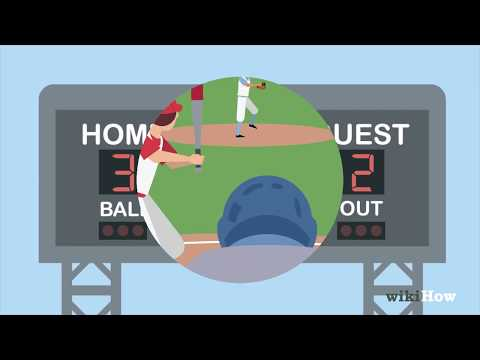

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

In [5]:
path_salaries = './data/baseballdatabank-2023/contrib/Salaries.csv'
path_people = './data/baseballdatabank-2023/core/People.csv'
path_pitching = './data/baseballdatabank-2023/core/Pitching.csv'

People = pd.read_csv(path_people, delimiter=",", header=0)
Salaries = pd.read_csv(path_salaries, delimiter=",", header=0)
Pitching = pd.read_csv(path_pitching, delimiter=",", header=0)

In [12]:
display(Salaries)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
21449,2010,WAS,NL,walkety01,650000
21450,2010,WAS,NL,wangch01,2000000
21451,2010,WAS,NL,willijo03,4600000
21452,2010,WAS,NL,zimmejo01,401000


In [13]:
Salaries_work = Salaries.copy()
Pitching_work = Pitching.copy()
People_work = People.copy()

In [11]:
Salaries_work = Salaries[Salaries['yearID'] <= 2010]
Pitching_work = Pitching[Pitching['yearID'] <= 2010]

In [14]:
Salaries_work = Salaries_work.drop_duplicates(subset=["yearID","playerID"], keep="first") 

In [20]:
print('size of the People dataframe', People_work.shape, '\n size of the Pitching dataframe', Pitching_work.shape, '\n size of the Salaries dataframe', Salaries_work.shape)

size of the People dataframe (20676, 24) 
 size of the Pitching dataframe (40433, 30) 
 size of the Salaries dataframe (21351, 5)


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

In [21]:
People_work = People_work[People_work['throws'].isin(['L', 'R'])]

**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [23]:
Pitching_work

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,0.0,7,6.0,1,571.0,2,55,9.0,3.0,14.0
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,9.0,0,3.0,1,257.0,12,24,1.0,1.0,8.0
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,1.0,0,2.0,0,135.0,0,20,1.0,1.0,1.0
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,7.0,7,7.0,0,848.0,1,97,13.0,7.0,17.0


In [27]:
merge_df = pd.merge(People_work, Pitching_work, left_on= 'playerID', right_on = 'playerID', how = 'right')

In [29]:
display(merge_df)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1841.0,NaN,NaN,USA,NY,Albany,1888.0,12.0,29.0,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1845.0,1.0,31.0,USA,NY,Brooklyn,1894.0,5.0,3.0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1844.0,11.0,NaN,USA,PA,Philadelphia,1912.0,9.0,26.0,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,1981.0,6.0,1.0,Venezuela,Carabobo,Puerto Cabello,NaN,NaN,NaN,...,0.0,7,6.0,1,571.0,2,55,9.0,3.0,14.0
40429,zieglbr01,1979.0,10.0,10.0,USA,KS,Pratt,NaN,NaN,NaN,...,9.0,0,3.0,1,257.0,12,24,1.0,1.0,8.0
40430,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,1.0,0,2.0,0,135.0,0,20,1.0,1.0,1.0
40431,zitoba01,1978.0,5.0,13.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,7.0,7,7.0,0,848.0,1,97,13.0,7.0,17.0


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

In [35]:
throws_missing = merge_df.groupby(by = 'yearID').apply(lambda x: pd.Series({"missing_values_per":(x["throws"].isna()).mean()*100}))
throws_missing

,missing_values_per
yearID,
1871,15.789474
1872,33.333333
1873,40.000000
1874,23.529412
1875,27.659574
...,...
2006,0.000000
2007,0.000000
2008,0.000000


Percentage of the data that was missing in 1892 for the throws column :          missing_values_per
yearID                    
1892              4.545455 %


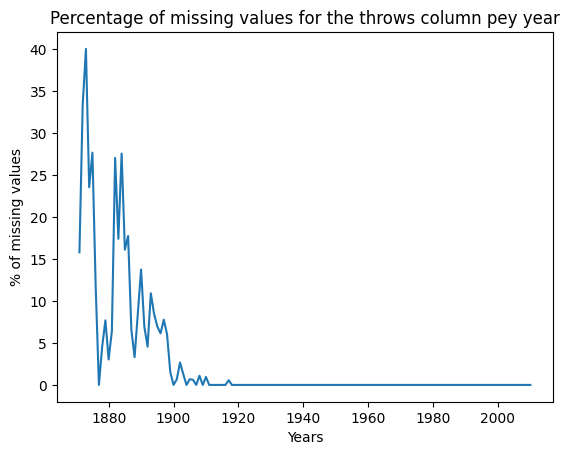

In [40]:
plt.plot(throws_missing)
plt.xlabel('Years')
plt.ylabel('% of missing values')
plt.title('Percentage of missing values for the throws column pey year')
print('Percentage of the data that was missing in 1892 for the throws column : ', throws_missing[throws_missing.index == 1892], '%')

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [44]:
filtered_merge_df = merge_df.copy()
filtered_Salaries_work = Salaries_work.copy()

filtered_merge_df = filtered_merge_df[filtered_merge_df['yearID'] >= 1920]
filtered_Salaries_work = filtered_Salaries_work[filtered_Salaries_work['yearID'] >= 1920]

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [47]:
filtered_merge_df

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
6552,acostjo01,1891.0,3.0,4.0,Cuba,La Habana,La Habana,1977.0,11.0,16.0,...,NaN,1,0.0,0,349.0,10,40,NaN,NaN,NaN
6553,adamsba01,1882.0,5.0,18.0,USA,IN,Tipton,1968.0,7.0,27.0,...,NaN,5,1.0,0,1035.0,2,83,NaN,NaN,NaN
6554,alexape01,1887.0,2.0,26.0,USA,NE,Elba,1950.0,11.0,4.0,...,NaN,3,1.0,0,1447.0,6,96,NaN,NaN,NaN
6555,altener01,1894.0,12.0,1.0,USA,OH,Avon,1981.0,9.0,9.0,...,NaN,0,1.0,0,112.0,7,27,NaN,NaN,NaN
6556,ayersdo01,1891.0,5.0,21.0,USA,VA,Snake Creek,1968.0,5.0,26.0,...,NaN,1,8.0,1,861.0,16,115,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,1981.0,6.0,1.0,Venezuela,Carabobo,Puerto Cabello,NaN,NaN,NaN,...,0.0,7,6.0,1,571.0,2,55,9.0,3.0,14.0
40429,zieglbr01,1979.0,10.0,10.0,USA,KS,Pratt,NaN,NaN,NaN,...,9.0,0,3.0,1,257.0,12,24,1.0,1.0,8.0
40430,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,1.0,0,2.0,0,135.0,0,20,1.0,1.0,1.0
40431,zitoba01,1978.0,5.0,13.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,7.0,7,7.0,0,848.0,1,97,13.0,7.0,17.0


In [49]:
full_merged_df = pd.merge(filtered_merge_df, filtered_Salaries_work, on=['playerID','yearID'], how = 'left')
display(full_merged_df)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,BK,BFP,GF,R,SH,SF,GIDP,teamID_y,lgID_y,salary
0,acostjo01,1891.0,3.0,4.0,Cuba,La Habana,La Habana,1977.0,11.0,16.0,...,0,349.0,10,40,NaN,NaN,NaN,NaN,NaN,NaN
1,adamsba01,1882.0,5.0,18.0,USA,IN,Tipton,1968.0,7.0,27.0,...,0,1035.0,2,83,NaN,NaN,NaN,NaN,NaN,NaN
2,alexape01,1887.0,2.0,26.0,USA,NE,Elba,1950.0,11.0,4.0,...,0,1447.0,6,96,NaN,NaN,NaN,NaN,NaN,NaN
3,altener01,1894.0,12.0,1.0,USA,OH,Avon,1981.0,9.0,9.0,...,0,112.0,7,27,NaN,NaN,NaN,NaN,NaN,NaN
4,ayersdo01,1891.0,5.0,21.0,USA,VA,Snake Creek,1968.0,5.0,26.0,...,1,861.0,16,115,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,1981.0,6.0,1.0,Venezuela,Carabobo,Puerto Cabello,NaN,NaN,NaN,...,1,571.0,2,55,9.0,3.0,14.0,CHN,NL,18875000.0
33877,zieglbr01,1979.0,10.0,10.0,USA,KS,Pratt,NaN,NaN,NaN,...,1,257.0,12,24,1.0,1.0,8.0,OAK,AL,410000.0
33878,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,0,135.0,0,20,1.0,1.0,1.0,NaN,NaN,NaN
33879,zitoba01,1978.0,5.0,13.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,0,848.0,1,97,13.0,7.0,17.0,SFN,NL,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


In [51]:
missing_salary = full_merged_df.groupby(by = 'yearID').apply(lambda x: pd.Series({"missing_salary_per":(x["salary"].isna()).mean()*100}))

Percentage of the data that was missing in 2002 for the salary column :          missing_salary_per
yearID                    
2002             36.267071 %


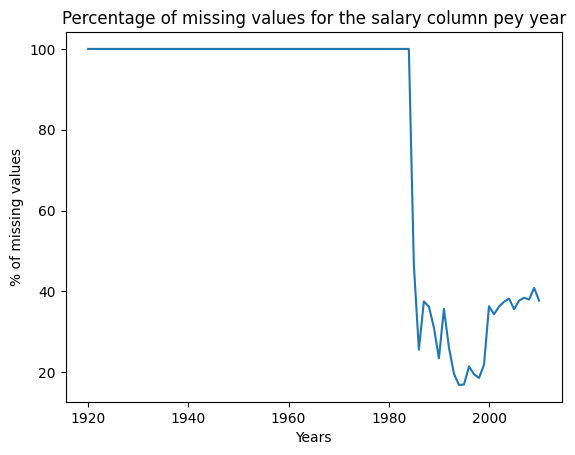

In [52]:
plt.plot(missing_salary)
plt.xlabel('Years')
plt.ylabel('% of missing values')
plt.title('Percentage of missing values for the salary column pey year')
print('Percentage of the data that was missing in 2002 for the salary column : ', missing_salary[missing_salary.index == 2002], '%')

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

In [60]:
first_year_salary = full_merged_df[~full_merged_df['salary'].isna()]['yearID'].min()
last_year_salary = full_merged_df[~full_merged_df['salary'].isna()]['yearID'].max()

print('first year with a salary value : ', first_year_salary, '\n last year with a salary value :', last_year_salary)

filtered_merge_df_2 = filtered_merge_df.copy()
filtered_merge_df_2 = filtered_merge_df_2[(filtered_merge_df_2['yearID'] >= first_year_salary) & (filtered_merge_df_2['yearID'] <= last_year_salary)]
display(filtered_merge_df_2)

first year with a salary value :  1985 
 last year with a salary value : 2010


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
24984,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,7.0,0,1.0,1,366.0,43,44,5.0,3.0,13.0
24985,abregjo01,1962.0,7.0,4.0,USA,TX,Corpus Christi,NaN,NaN,NaN,...,1.0,0,0.0,0,109.0,0,18,5.0,1.0,3.0
24986,ackerji01,1958.0,9.0,24.0,USA,TX,Freer,NaN,NaN,NaN,...,1.0,2,3.0,0,370.0,26,35,1.0,2.0,16.0
24987,agostju01,1958.0,2.0,23.0,P.R.,NaN,Rio Piedras,NaN,NaN,NaN,...,1.0,0,3.0,0,246.0,21,27,3.0,3.0,4.0
24988,aguilri01,1961.0,12.0,31.0,USA,CA,San Gabriel,NaN,NaN,NaN,...,2.0,5,2.0,2,507.0,1,49,7.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,1981.0,6.0,1.0,Venezuela,Carabobo,Puerto Cabello,NaN,NaN,NaN,...,0.0,7,6.0,1,571.0,2,55,9.0,3.0,14.0
40429,zieglbr01,1979.0,10.0,10.0,USA,KS,Pratt,NaN,NaN,NaN,...,9.0,0,3.0,1,257.0,12,24,1.0,1.0,8.0
40430,zimmejo02,1986.0,5.0,23.0,USA,WI,Auburndale,NaN,NaN,NaN,...,1.0,0,2.0,0,135.0,0,20,1.0,1.0,1.0
40431,zitoba01,1978.0,5.0,13.0,USA,NV,Las Vegas,NaN,NaN,NaN,...,7.0,7,7.0,0,848.0,1,97,13.0,7.0,17.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [61]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

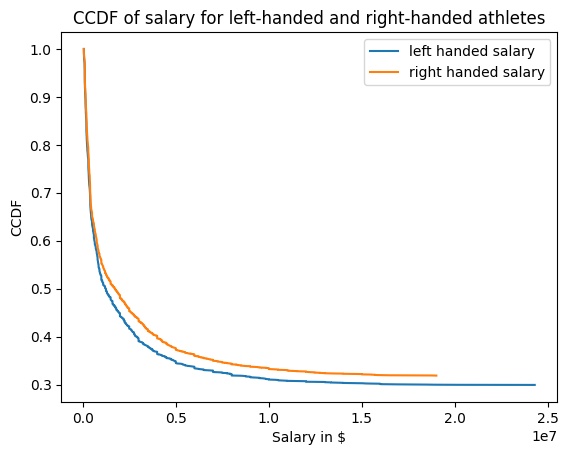

In [66]:
left_handed = df[df['throws'] == 'L']
right_handed = df[df['throws'] == 'R']

left_handed_salary = left_handed['salary']
right_handed_salary = right_handed['salary']

def ccdf(data): 
    # Sort the data then calculate ccdf
    sort_data = np.sort(data)
    ccdf = 1 - np.arange(1, len(sort_data) + 1) / len(sort_data)
    return sort_data, ccdf 

left_handed_data_sorted, left_handed_ccdf = ccdf(left_handed_salary)
right_handed_data_sorted, right_handed_ccdf = ccdf(right_handed_salary)

plt.plot(left_handed_data_sorted, left_handed_ccdf, label = 'left handed salary')
plt.plot(right_handed_data_sorted, right_handed_ccdf, label = 'right handed salary')
plt.xlabel('Salary in $')
plt.ylabel('CCDF')
plt.title('CCDF of salary for left-handed and right-handed athletes')
plt.legend()
plt.show()



**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

problem, il faut pas plot en linear, plutot en semilog ou en loglog, on voit rien 

**2.3 —** Implement the solution proposed by yourself in the previous question.

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

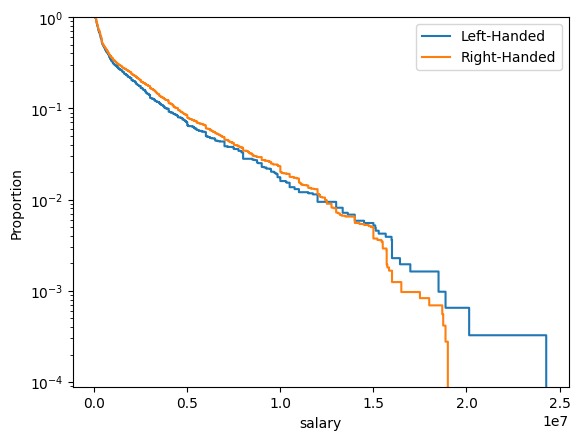

In [68]:
import seaborn as sns 
plt.figure()
sns.ecdfplot(x=left_handed_salary, log_scale=[False, True], complementary=True)
sns.ecdfplot(x=right_handed_salary, log_scale=[False, True], complementary=True)
plt.legend(["Left-Handed","Right-Handed"])


**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

we can see a bigger difference, below 1.25*10^7, the right-handed players are more likely to have a higher salary than their left-handed counterparts. However, above this salary threshold, left-handed players tend to earn more than the right-handed players.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

left handed 95% confidence interval in  1352629.47, 1521836.25 $
right handed 95% confidence interval in 1539504.72, 1654515.55 $


c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) in

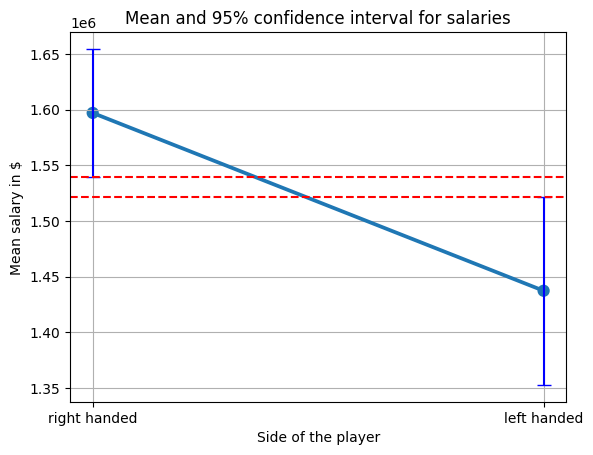

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [76]:
from scipy import stats
mean_left = left_handed['salary'].mean()
std_left = left_handed['salary'].std()

mean_right = right_handed['salary'].mean()
std_right = right_handed['salary'].std()

scale_left = stats.sem(left_handed['salary'], nan_policy = 'omit')  
scale_right = stats.sem(right_handed['salary'], nan_policy= 'omit')

left_conf = (mean_left - 1.96 * scale_left, mean_left + 1.96 * scale_left)
right_conf = (mean_right - 1.96 * scale_right, mean_right + 1.96 * scale_right)

print(f"left handed 95% confidence interval in  {left_conf[0]:0.2f}, {left_conf[1]:0.2f} $")
print(f"right handed 95% confidence interval in {right_conf[0]:0.2f}, {right_conf[1]:0.2f} $")

sns.pointplot(x=['right handed', 'left handed'], y= [mean_right, mean_left])

# Add CI  

plt.errorbar(x = 'right handed', y = mean_right, yerr = 1.96*scale_right, color = 'blue',capsize=5)
plt.errorbar(x = 'left handed', y = mean_left, yerr = 1.96*scale_left , color = 'blue', capsize=5)
max_left = mean_left + 1.96*scale_left
min_right = mean_right - 1.96*scale_right
x = ['right handed', 'left handed']

plt.axhline(y=max_left, color='red', linestyle='--')
plt.axhline(y=min_right, color='red', linestyle='--')
plt.title('Mean and 95% confidence interval for salaries')
plt.xlabel('Side of the player')
plt.ylabel('Mean salary in $')
plt.grid()
plt.show()
plt.figure()


**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

significant si ça overlap pas, ici ça overlap pas --> statistically significant

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [78]:
t_stat, p_value = stats.ttest_ind(right_handed_salary, left_handed_salary, nan_policy = 'omit', equal_var = False)
print('p value: ', p_value)

p value:  0.0022133085934849146


here p_value < 0.05 --> reject the null hypothesis

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [83]:
filtered_pitchers = df[df['G'] >= 5]
left_handed_filtered = filtered_pitchers[filtered_pitchers['throws'] == 'L']
right_handed_filtered = filtered_pitchers[filtered_pitchers['throws'] == 'R']

left_handed_oba = left_handed_filtered['BAOpp'].mean()
right_handed_oba = right_handed_filtered['BAOpp'].mean()


t_stat, p_value = stats.ttest_ind(right_handed_filtered['BAOpp'], left_handed_filtered['BAOpp'], nan_policy = 'omit', equal_var = False)
print('p value: ', p_value)
print('mean OBA for left handed pitchers: ', left_handed_oba)
print('mean OBA for right handed pitchers: ', right_handed_oba)


p value:  0.008097976638277517
mean OBA for left handed pitchers:  0.27038519285529383
mean OBA for right handed pitchers:  0.2678352186208397


reject null hypothesis

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

In [86]:
left_handed_salary_2000 = left_handed[left_handed['yearID'] == 2000]['salary']
right_handed_salary_2000 = right_handed[right_handed['yearID'] == 2000]['salary']
t_stat, p_value = stats.ttest_ind(right_handed_salary_2000, left_handed_salary_2000, nan_policy = 'omit', equal_var = False)
print('p value: ', p_value)

p value:  0.7150532224665255


on ne peut pas rejeter l'hypothèse nulle

In [90]:
left_handed_filtered_2000 = left_handed_filtered[left_handed_filtered['yearID'] == 2000]
right_handed_filtered_2000 = right_handed_filtered[right_handed_filtered['yearID'] == 2000]

left_handed_oba_2000 = left_handed_filtered_2000['BAOpp'].mean()
right_handed_oba_2000 = right_handed_filtered_2000['BAOpp'].mean()


t_stat, p_value = stats.ttest_ind(right_handed_filtered_2000['BAOpp'], left_handed_filtered_2000['BAOpp'], nan_policy = 'omit', equal_var = False)
print('p value: ', p_value)
print('mean OBA for left handed pitchers in 2000: ', left_handed_oba)
print('mean OBA for right handed pitchers in 2000: ', right_handed_oba)

p value:  0.8756487118716199
mean OBA for left handed pitchers in 2000:  0.27038519285529383
mean OBA for right handed pitchers in 2000:  0.2678352186208397


we cannot reject the null hypothesis

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

In [101]:
data['BAOpp']

0        0.415
1        0.361
2        0.284
3        0.210
4        0.324
         ...  
14981    0.253
14982    0.266
14983    0.875
14984    0.285
14985    0.500
Name: BAOpp, Length: 14986, dtype: float64

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

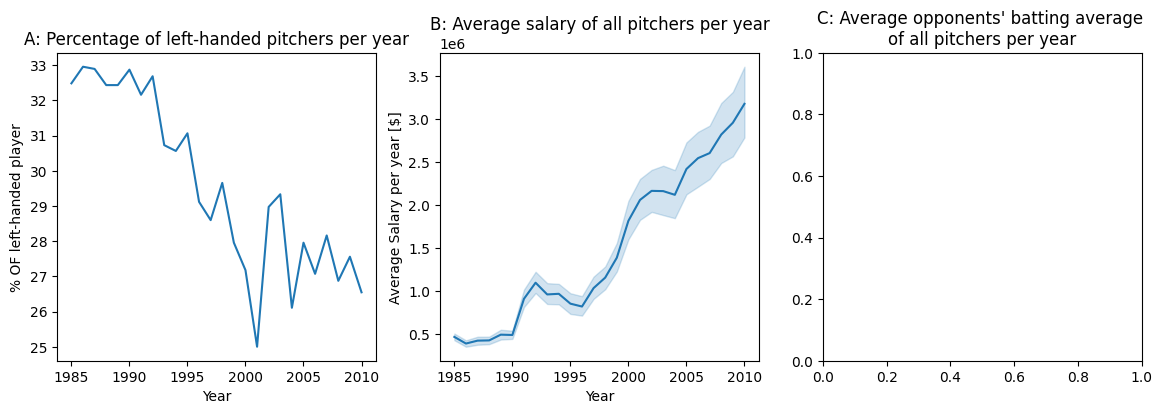

In [100]:
data = df.copy()

fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].set_title("A: Percentage of left-handed pitchers per year")
ax[1].set_title("B: Average salary of all pitchers per year")
ax[2].set_title("C: Average opponents' batting average \nof all pitchers per year")

mean_left_handed = data.groupby(['yearID']).apply(lambda x: (x['throws'] == 'L').mean()*100)
mean_left_handed =mean_left_handed.reset_index()
mean_left_handed.columns = ["Year","average_left_handed"]

ax[0].plot(mean_left_handed.Year,mean_left_handed.average_left_handed)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("% OF left-handed player")
meanl_2007 = mean_left_handed.loc[mean_left_handed['Year'] == 2007, 'average_left_handed'].iloc[0] # Stats for year 2007


mean_per_year = data.groupby(['yearID']).apply(lambda x: x['salary'].mean())
mean_per_year =mean_per_year.reset_index()
mean_per_year.columns = ["Year","average_salary"]


sns.lineplot(x = 'yearID', y='salary',data=data , ax=ax[1])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Average Salary per year [$]")
mean_salary_2007 = mean_per_year.loc[mean_per_year['Year'] == 2007, 'average_salary'].iloc[0] # Stats for year 2007

mean_oba_year = data.groupby(['yearID']).apply(lambda x: x['BAOpp'].mean())
mean_oba_year =mean_per_year.reset_index()
mean_oba_year.columns = ["Year","oba"]

sns.lineplot(x= 'yearID', y= "BAOpp", data = data, ax = ax[2])
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Average opponents' batting average")
mean_oba_2007 = mean_oba_year.loc[mean_oba_year['Year'] == 2007, 'oba'].iloc[0] # Stats for year 2007

fig.tight_layout()
plt.show()

print(f"Stats for year 2007 : \n\
        {meanl_2007:.2f} % of players are left-handed  \n\
        {mean_salary_2007:.2f} $ is the average salary over all players\n\
        {mean_oba_2007:.5f} is the average opponents' batting average")


**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Admin\miniconda3\envs\ada\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

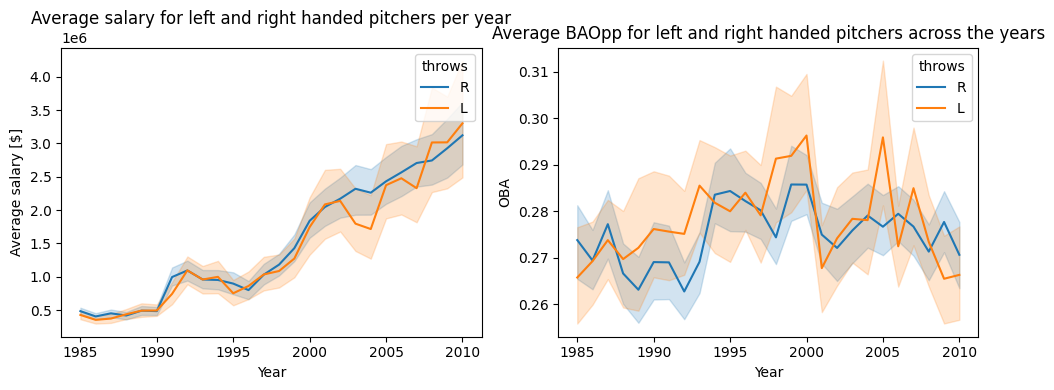

Stats for year 1999: 
        1272792.28 $ is the mean salary for left-handed players 
        0.28578 is the OBA for right-handed players


In [107]:
data = df.copy()

fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].set_title('Average salary for left and right handed pitchers per year')
ax[1].set_title('Average BAOpp for left and right handed pitchers across the years')


sns.lineplot(x = 'yearID', y= 'salary' ,data=data, hue = 'throws', ax = ax[0])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Average salary [$]")


sns.lineplot(x = 'yearID', y= 'BAOpp' ,data=data, hue = 'throws', ax = ax[1])
ax[1].set_xlabel("Year")
ax[1].set_ylabel("OBA")


fig.tight_layout()
plt.show()



mean_salary_1999 = data.query("yearID==1999 & throws == 'L'").salary.mean()
mean_oba_1999 = data.query("yearID==1999 & throws == 'R'").BAOpp.mean()
print(f"Stats for year 1999: \n\
        {mean_salary_1999:.2f} $ is the mean salary for left-handed players \n\
        {mean_oba_1999:.5f} is the OBA for right-handed players")

**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


C:\Users\Admin\AppData\Local\Temp\ipykernel_14052\552988825.py:10: FutureWarning: The provided callable <function mean at 0x000001F073697E50> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  yearly_statsR = dataR.groupby('yearID')['binary_indicator'].agg([np.mean, stats.sem])
C:\Users\Admin\AppData\Local\Temp\ipykernel_14052\552988825.py:11: FutureWarning: The provided callable <function mean at 0x000001F073697E50> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  yearly_statsL = dataL.groupby('yearID')['binary_indicator'].agg([np.mean, stats.sem])


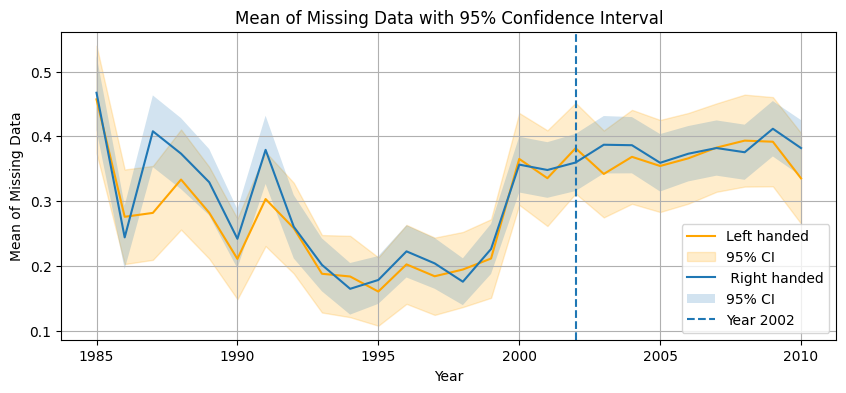

In year 2002, the fraction of missing data for left-handed player is 38.172%


In [108]:
data = df.copy()
dataR = data.loc[data['throws']=='R'].copy()
dataL = data.loc[data['throws']=='L'].copy()

# Convert nan values to 1 and existing values to 0
dataR['binary_indicator'] = dataR["salary"].isna().astype(int)
dataL['binary_indicator'] = dataL["salary"].isna().astype(int)

# Calculate means of missing values and sem for every year
yearly_statsR = dataR.groupby('yearID')['binary_indicator'].agg([np.mean, stats.sem])
yearly_statsL = dataL.groupby('yearID')['binary_indicator'].agg([np.mean, stats.sem])

z = 1.96

# Confidence interval for each year, z-score for 95% confidence interval is 1.96
yearly_statsR['lower_bound'] = yearly_statsR['mean'] - z * yearly_statsR['sem']
yearly_statsR['upper_bound'] = yearly_statsR['mean'] + z * yearly_statsR['sem']
yearly_statsL['lower_bound'] = yearly_statsL['mean'] - z * yearly_statsL['sem']
yearly_statsL['upper_bound'] = yearly_statsL['mean'] + z * yearly_statsL['sem']


plt.figure(figsize=(10,4))

plt.plot(yearly_statsL.index, yearly_statsL['mean'], color="orange", label="Left handed")
plt.fill_between(yearly_statsL.index, yearly_statsL['lower_bound'], yearly_statsL['upper_bound'], alpha=0.2, label='95% CI', color="orange")

plt.plot(yearly_statsR.index, yearly_statsR['mean'], label = " Right handed")
plt.fill_between(yearly_statsR.index, yearly_statsR['lower_bound'], yearly_statsR['upper_bound'], alpha=0.2, label='95% CI')

plt.axvline(2002,ls='--', label="Year 2002")

plt.xlabel('Year')
plt.ylabel('Mean of Missing Data')
plt.title('Mean of Missing Data with 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

missing_L_2002 = yearly_statsL.loc[yearly_statsL.index==2002]['mean'].iloc[0]
print(f"In year 2002, the fraction of missing data for left-handed player is {missing_L_2002:.3%}")

**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?

If 95% of the data were missing, it would not be representative of the real distribution. Maybe only the 5% highest (or lowest) values would be available and the reality would be totally different. We could conclude on a significantly higher salary for the right-handed players, where in reality it could be the total opposite.